In [5]:
!pip install split-folders
!pip install keras

In [6]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt

import wave, os, glob
%matplotlib inline

import librosa
import librosa.display
import IPython.display
import random
import warnings
import os
from PIL import Image
import pathlib
import csv
# sklearn Preprocessing
from sklearn.model_selection import train_test_split
#Keras
import keras
import warnings
warnings.filterwarnings('ignore')
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from google.colab import drive
import splitfolders

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


dataset = pd.read_pickle('/content/drive/My Drive/ICBHI_data/Final_Data.pkl')
dataset_sequential = dataset.copy()


Mounted at /content/drive/


In [7]:
path_to_audio_files = []
audio_and_txt = "/content/drive/My Drive/ICBHI_data/ICBHI_final_database"

for filename in glob.glob(os.path.join(audio_and_txt, '*.wav')):
    path_to_audio_files.append(filename)
audio_files_data = pd.DataFrame(path_to_audio_files, columns = ['audio_file'])

In [20]:
audio_files_data

,audio_file
0,/content/drive/My Drive/ICBHI_data/ICBHI_final...
1,/content/drive/My Drive/ICBHI_data/ICBHI_final...
2,/content/drive/My Drive/ICBHI_data/ICBHI_final...
3,/content/drive/My Drive/ICBHI_data/ICBHI_final...
4,/content/drive/My Drive/ICBHI_data/ICBHI_final...
...,...
915,/content/drive/My Drive/ICBHI_data/ICBHI_final...
916,/content/drive/My Drive/ICBHI_data/ICBHI_final...
917,/content/drive/My Drive/ICBHI_data/ICBHI_final...
918,/content/drive/My Drive/ICBHI_data/ICBHI_final...


In [8]:
dataset_sequential.columns = dataset_sequential.columns.map(str)

start = dataset_sequential.columns.get_loc("0")
end = dataset_sequential.columns.get_loc("192")

data = dataset_sequential.iloc[:, start: end]

patient_diagnosis = dataset_sequential[["Patient number", "Diagnosis"]]

In [10]:
patient_number = np.array(dataset_sequential["Patient number"])
diagnosis = np.array(dataset_sequential["Diagnosis"])
dic={}
for i in range(patient_number.size):
  temp = {'{}'.format(patient_number[i]) : '{}'.format(diagnosis[i])}
  # temp[patient_number[i]] = diagnosis[i]
  dic.update(temp)



In [11]:
for d in diagnosis:# make folders acc to diagnosis number
    pathlib.Path(f'/content/drive/My Drive/ICBHI_data/image_data/{d}').mkdir(parents=True, exist_ok=True)


In [12]:
for filename in audio_files_data.audio_file:
    audio_name = filename.split('/')[-1]
    if (int(audio_name[:3])) in patient_number:
      # print(dic[(filename[:3])])
      y, sr = librosa.load(filename, mono=True, duration=5)
      plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, sides='default', mode='default', scale='dB');
      plt.axis('off');
      plt.savefig(f'/content/drive/My Drive/ICBHI_data/image_data/{dic[(audio_name[:3])]}/{audio_name[:-4]}.png')
      plt.clf()

<Figure size 640x480 with 0 Axes>

In [34]:
splitfolders.ratio('/content/drive/My Drive/ICBHI_data/image_data', output="/content/drive/My Drive/ICBHI_data/data", seed=1337, ratio=(.8, .1, .1))


Copying files: 821 files [00:19, 42.47 files/s]


In [35]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [37]:
training_set = train_datagen.flow_from_directory(
        '/content/drive/My Drive/ICBHI_data/data/train',
        target_size=(64, 64),
        batch_size=1,
        class_mode='categorical',
        shuffle = False)

test_set = test_datagen.flow_from_directory(
        '/content/drive/My Drive/ICBHI_data/data/val',
        target_size=(64, 64),
        batch_size=1,
        class_mode='categorical',
        shuffle = False )


Found 654 images belonging to 6 classes.
Found 167 images belonging to 6 classes.


In [38]:
model = Sequential()
input_shape=(64, 64, 3)#1st hidden layer
model.add(Conv2D(32, (3, 3), strides=(2, 2), input_shape=input_shape))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))#2nd hidden layer
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))#3rd hidden layer
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))#Flatten
model.add(Flatten())
model.add(Dropout(rate=0.5))#Add fully connected layer.
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))#Output layer
model.add(Dense(6))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 31, 31, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 7, 7, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 3, 3, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 6)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,638 (365.77 KB)

 Trainable params: 93,638 (365.77 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
epochs = 255
batch_size = 8
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.9
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])

In [41]:
history = model.fit(
        training_set,
        steps_per_epoch=50,
        epochs=50,
        validation_data=test_set,
        validation_steps=165)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.5814 - loss: 1.2541 - val_accuracy: 0.8485 - val_loss: 0.9534
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - accuracy: 0.9088 - loss: 0.6562 - val_accuracy: 0.8485 - val_loss: 0.8149
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.8517 - loss: 0.8281 - val_accuracy: 0.8485 - val_loss: 0.8177
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - accuracy: 0.9750 - loss: 0.3740 - val_accuracy: 0.8485 - val_loss: 0.7023
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9266 - loss: 0.4792 - val_accuracy: 0.8485 - val_loss: 0.9072
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.8127 - loss: 1.1913 - val_accuracy: 0.8485 - val_loss: 0.7679
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.8606 - loss: 0.8287 - val_accuracy: 0.8485 - val_loss: 0.9975
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8742 - loss: 0.8642 - val_accuracy: 0.848

In [44]:
model.evaluate(test_set, steps=50)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5983 - loss: 1.9150


[0.6840656399726868, 0.8600000143051147]

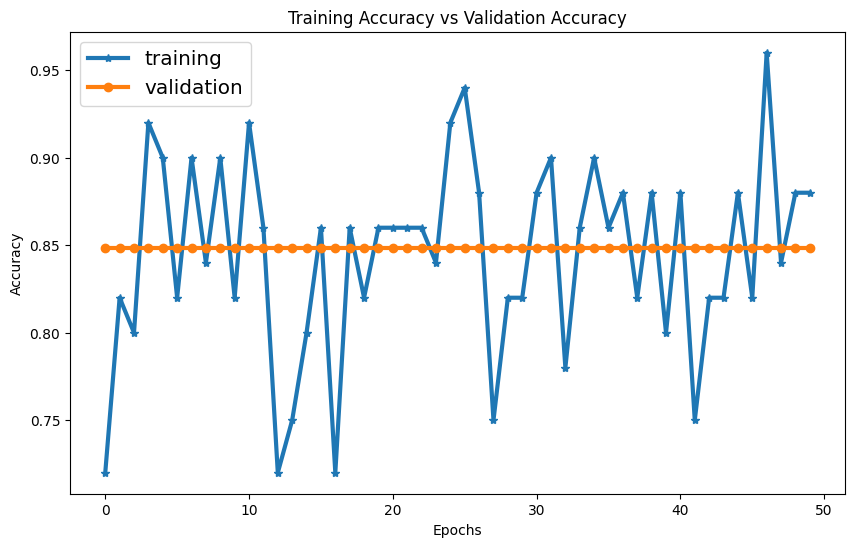

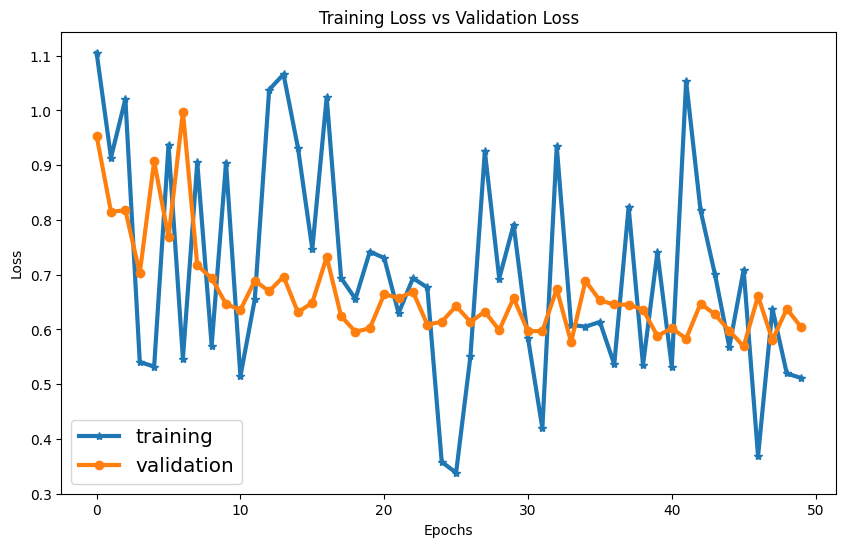

In [45]:
def visualize_training(history, lw = 3):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['accuracy'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_accuracy'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize = 'x-large')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_loss'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize = 'x-large')
    plt.show()
visualize_training(history)